<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/Multiple_Linear_Regression_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df =pd.read_csv("/content/50_Startups.csv")

In [47]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Let's do some EDA & Feature selection

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [49]:
df.shape

(50, 5)

In [50]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [51]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<ipython-input-52-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

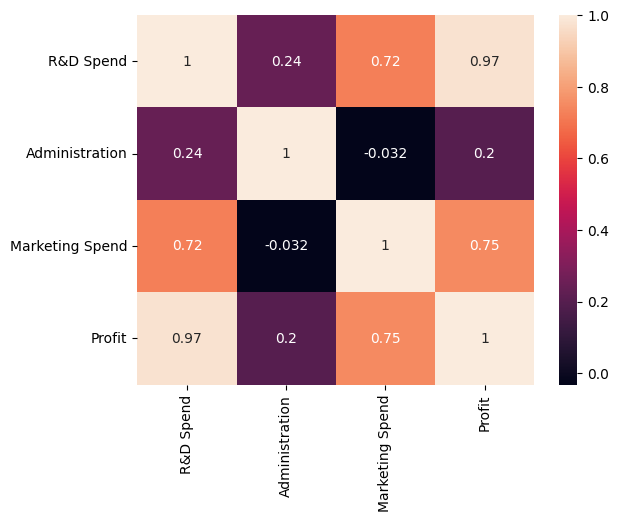

In [52]:
sns.heatmap(df.corr(),annot=True)

Let's draw a scatterplot to better see the correlation between R&D Spend and Profit.

<Axes: xlabel='R&D Spend', ylabel='Profit'>

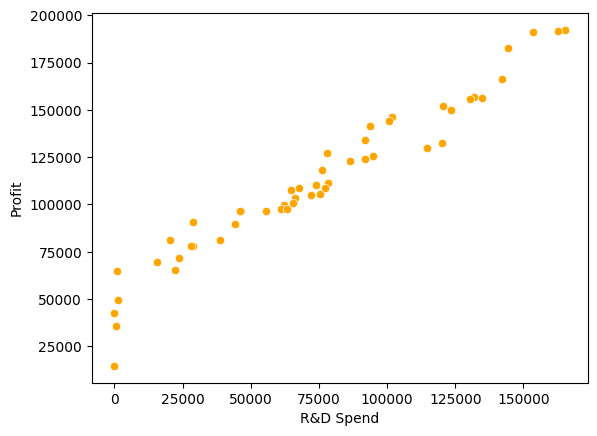

In [53]:
sns.scatterplot(x = "R&D Spend" ,y = "Profit", data = df, color = "orange")

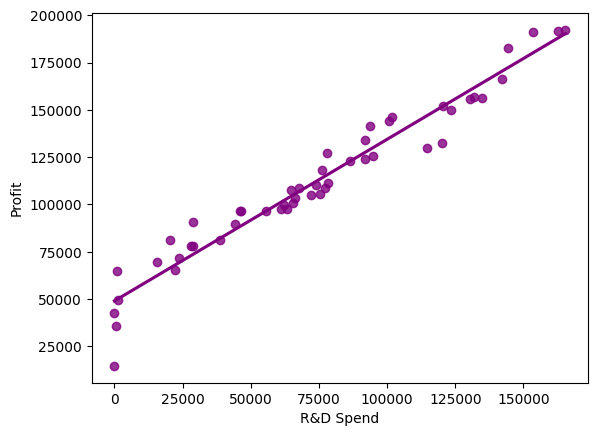

In [54]:
sns.regplot(data = df, x = "R&D Spend" ,y = "Profit", ci = None, color = "purple");

Let's draw a histogram over df to see the distribution of numerical variables.

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

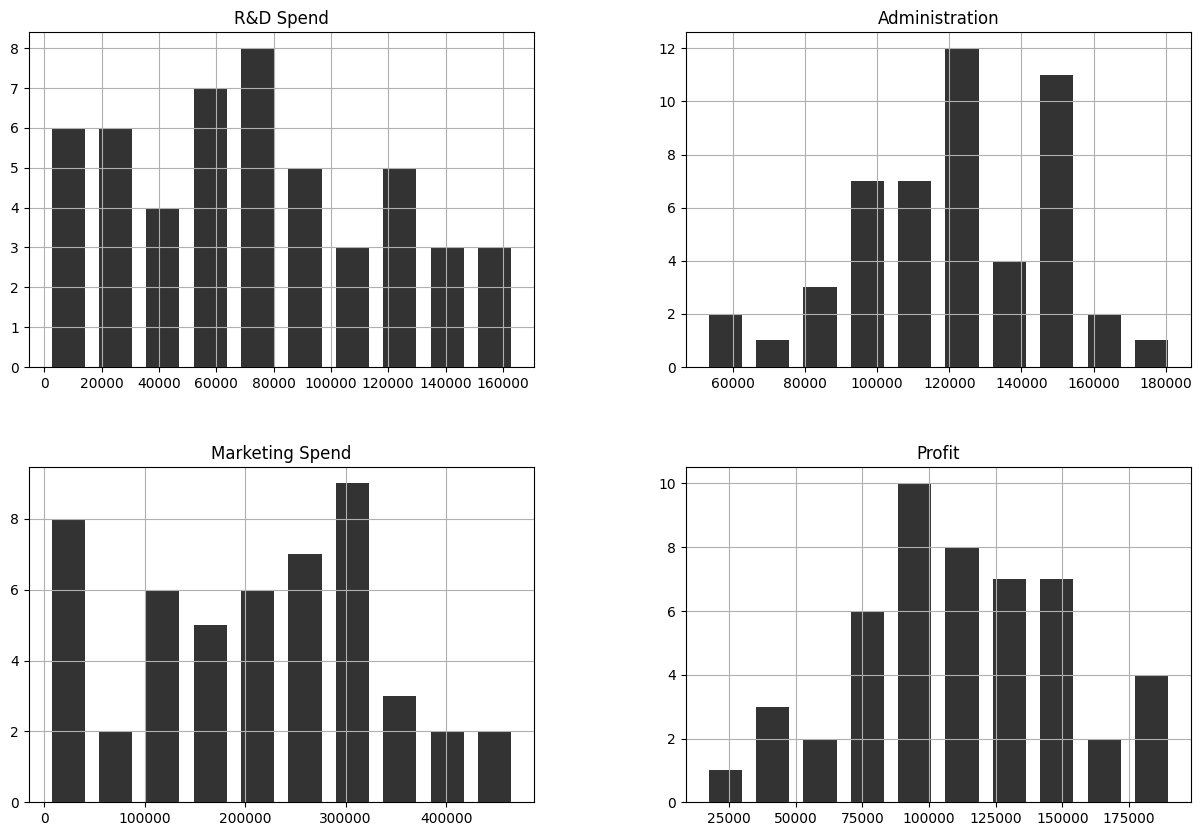

In [55]:
df.hist(color="black",rwidth=0.7,alpha=0.8,figsize=(15,10))


Let's view the basic statistics values ​​of the data frame.

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


Let's display the unique values ​​of State.

In [57]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Let's make categorical attribute inferences about State with the help of get_dummies. Because States have no superiority over each other, they are nominal. It's not ordinal

In [58]:
df["State"] = pd.Categorical(df["State"])
df_dummy=pd.get_dummies(df["State"], prefix="State")

In [59]:
df_dummy.head()

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [60]:
df =pd.concat([df,df_dummy], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


Let's update our data frame by deleting the State attribute and excluding one of the States created as dummy.

In [61]:
df.drop(["State"], axis = 1, inplace= True)

In [62]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [63]:
df.drop(["State_Florida"], axis = 1, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


Let's segment our data frame into dependent and independent variables.

In [64]:
x = df.drop("Profit", axis=1)
y = df["Profit"]

Let's check the dependent and independent variables.

In [65]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [66]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Let's create 4 parts, train and test, from these dependent and independent variables. Let's use train_test_split to do this.

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 13 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         10 non-null     float64
 1   Administration    10 non-null     float64
 2   Marketing Spend   10 non-null     float64
 3   State_California  10 non-null     uint8  
 4   State_New York    10 non-null     uint8  
dtypes: float64(3), uint8(2)
memory usage: 340.0 bytes


Let's check 4 parts variables.

In [68]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
12,93863.75,127320.38,249839.44,0,0
4,142107.34,91391.77,366168.42,0,0
37,44069.95,51283.14,197029.42,1,0
8,120542.52,148718.95,311613.29,0,1
3,144372.41,118671.85,383199.62,0,1


In [69]:
x_test

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
13,91992.39,135495.07,252664.93,1,0
39,38558.51,82982.09,174999.30,1,0
30,61994.48,115641.28,91131.24,0,0
45,1000.23,124153.04,1903.93,0,1
17,94657.16,145077.58,282574.31,0,1
48,542.05,51743.15,0.00,0,1
26,75328.87,144135.98,134050.07,0,0
25,64664.71,139553.16,137962.62,1,0
32,63408.86,129219.61,46085.25,1,0
19,86419.70,153514.11,0.00,0,1


In [70]:
y_train.head()

12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [71]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

Let's include LinearRegression into the core and build the model.

In [72]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

Let's give the training data created from dependent independent variables to train the model.

In [73]:
model = lm.fit(x_train, y_train)
model

LinearRegression()

Let's have the model predict the dependent test variable that it has not seen before. Let's assign these predicted values ​​to the y_pred variable.

In [74]:
y_pred=lm.predict(x_test)
y_pred

array([126362.87908253,  84608.4538364 ,  99677.49425152,  46357.46068582,
       128750.482885  ,  50912.41741896, 109741.35032701, 100643.24281645,
        97599.27574598, 113097.42524435])

Let's gather the predictions and actual values ​​in a data frame and look at them.

In [75]:
df=pd.DataFrame({"Actual Data":y_test, "Prediction Data":y_pred,"Margin of Error":abs(y_test - y_pred), "Percentage of Error":(abs(y_test - y_pred)/y_test)*100})
df

,Actual Data,Prediction Data,Margin of Error,Percentage of Error
13,134307.35,126362.879083,7944.470917,5.915142
39,81005.76,84608.453836,3602.693836,4.447454
30,99937.59,99677.494252,260.095748,0.260258
45,64926.08,46357.460686,18568.619314,28.599631
17,125370.37,128750.482885,3380.112885,2.696102
48,35673.41,50912.417419,15239.007419,42.718113
26,105733.54,109741.350327,4007.810327,3.790482
25,107404.34,100643.242816,6761.097184,6.294994
32,97427.84,97599.275746,171.435746,0.175962
19,122776.86,113097.425244,9679.434756,7.883761



Let's include the metrics hosted in sklearn into the core and display the MAE, MSE, RMSE values.

In [76]:
import sklearn.metrics as metrics
import math

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(MSE)

In [77]:
print("Mean absolute error value (MAE):", MAE)
print("Mean square error value (MSE):", MSE)
print("Square root mean square error value (RMSE):", RMSE) #To find the distance between the estimated and real value

Mean absolute error value (MAE): 6961.477813266986
Mean square error value (MSE): 82010363.04475
Square root mean square error value (RMSE): 9055.957323483255


Let's print the R Squared value of the model on the training data.

In [78]:
print("R Squared: ", lm.score(x_train, y_train))

R Squared:  0.9537019995248526


In [79]:
import statsmodels.api as sm

In [80]:
model2 = sm.OLS(y,x).fit()

In [81]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              765.9
Date:                Thu, 21 Mar 2024   Prob (F-statistic):                    2.49e-42
Time:                        20:12:53   Log-Likelihood:                         -543.87
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      45   BIC:                                      1107.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7217      0.064     11.260      0.000       0.593       0.851
Administration       0.2847      0.038      7.465      0.000       0.208       0.362
Marketing Spend      0.0830      0.022      3.833      0.000       0.039       0.127
State_California  7720.4710   4539.299      1.701      0.096   -1422.146    1.69e+04
State_New York    7126.6916   4530.146      1.573      0.123   -1997.491    1.63e+04
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     8.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's obtain the success score by folding the data through the cross_val_score and cross_val_predict methods.

In [82]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict

In [83]:
repeated_values = cross_val_score(model, x_train, y_train, cv=10, scoring="r2")
repeated_values

array([0.9226481 , 0.97501191, 0.93143071, 0.96694209, 0.9408353 ,
       0.93863795, 0.9631974 , 0.93125019, 0.87182566, 0.70645281])

In [84]:
repeated_values.mean()

0.9148232109573252

As a result, we achieved a success rate of 95 in the training data for lm.score() above, but when we performed the same operation on 10 different parts, the average value was 91, which allowed us to obtain a healthier result.